In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [3]:
from scipy.stats import chi2_contingency

#data transformation
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Decision Tree Regressor Model
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

# Random Forest Regressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

In [95]:
data = pd.read_csv('final_data.csv',encoding='cp1252')
data

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,NaN,7.0,8.6,33.0,200.0,6.0,3.0
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25.0,263.0,4.0,5.0
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29.0,232.0,5.0,6.0
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27.0,242.0,5.0,6.0
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29.0,230.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
940,2022,Volvo,XC40 T5 AWD,SUV: Small,2.0,4,AS8,Z,10.7,7.7,9.4,30.0,219.0,5.0,5.0
941,2022,Volvo,XC60 B5 AWD,SUV: Small,2.0,4,AS8,Z,10.5,8.1,9.4,30.0,219.0,5.0,5.0
942,2022,Volvo,XC60 B6 AWD,SUV: Small,2.0,4,AS8,Z,11.0,8.7,9.9,29.0,232.0,5.0,NaN
943,2022,Volvo,XC90 T5 AWD,SUV: Standard,2.0,4,AS8,Z,11.5,8.4,10.1,28.0,236.0,5.0,5.0


In [97]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 945 entries, 0 to 944
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Model Year                         945 non-null    int64  
 1   Make                               945 non-null    object 
 2   Model                              945 non-null    object 
 3   Vehicle Class                      945 non-null    object 
 4   Engine Size(L)                     945 non-null    float64
 5   Cylinders                          945 non-null    int64  
 6   Transmission                       945 non-null    object 
 7   Fuel Type                          944 non-null    object 
 8   Fuel Consumption (City (L/100 km)  931 non-null    float64
 9   Fuel Consumption(Hwy (L/100 km))   930 non-null    float64
 10  Fuel Consumption(Comb (L/100 km))  945 non-null    float64
 11  Fuel Consumption(Comb (mpg))       931 non-null    float64

In [99]:
data.columns

Index(['Model Year', 'Make', 'Model', 'Vehicle Class', 'Engine Size(L)',
       'Cylinders', 'Transmission', 'Fuel Type',
       'Fuel Consumption (City (L/100 km)', 'Fuel Consumption(Hwy (L/100 km))',
       'Fuel Consumption(Comb (L/100 km))', 'Fuel Consumption(Comb (mpg))',
       'CO2 Emissions(g/km)', 'CO2 Rating', 'Smog Rating'],
      dtype='object')

In [101]:
data[['CO2 Rating','Smog Rating','CO2 Emissions(g/km)']].corr()

,CO2 Rating,Smog Rating,CO2 Emissions(g/km)
CO2 Rating,1.000000,0.503795,-0.955018
Smog Rating,0.503795,1.000000,-0.520441
CO2 Emissions(g/km),-0.955018,-0.520441,1.000000


In [103]:
df= data.drop(['Model Year','Make','Model','Fuel Consumption (City (L/100 km)','Fuel Consumption(Hwy (L/100 km))','Fuel Consumption(Comb (mpg))','CO2 Emissions(g/km)','Smog Rating'],axis=1)

In [105]:
df.head()

,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption(Comb (L/100 km)),CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


In [107]:
df = df.rename(columns = {'Vehicle Class':'Vehicle Class', 'Engine Size(L)':'Engine Size', 'Cylinders': 'Cylinders', 'Transmission':'Transmission','Fuel Type':'Fuel Type', 'Fuel Consumption(Comb (L/100 km))':'Fuel Consumption', 'CO2 Rating':'CO2 Rating'})

In [109]:
df.head(2)

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0


In [111]:
df.isna().sum()

Vehicle Class        0
Engine Size          0
Cylinders            0
Transmission         0
Fuel Type            1
Fuel Consumption     0
CO2 Rating          13
dtype: int64

In [113]:
df['Fuel Type'].fillna((df['Fuel Type'].mode()[0]), inplace=True)

In [115]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM8,Z,8.6,6.0
1,SUV: Small,3.5,6,AS10,Z,11.2,4.0
2,SUV: Small,2.0,4,AS10,Z,9.9,5.0
3,SUV: Small,2.0,4,AS10,Z,10.3,5.0
4,Compact,2.0,4,AS10,Z,9.8,5.0


In [117]:
df[['Fuel Consumption','CO2 Rating']].corr()

,Fuel Consumption,CO2 Rating
Fuel Consumption,1.00000,-0.92762
CO2 Rating,-0.92762,1.00000


In [119]:
df[['Fuel Consumption','CO2 Rating']].groupby('CO2 Rating').median()

,Fuel Consumption
CO2 Rating,
1.0,21.5
2.0,16.0
3.0,13.9
4.0,11.7
5.0,9.9
6.0,8.3
7.0,7.3
8.0,6.0
9.0,4.8


In [121]:
df['CO2 Rating'].fillna(0,inplace=True)
new_ratting = []

for fuel,co2 in zip(df['Fuel Consumption'], df['CO2 Rating']):
    if co2==0:
        if 20 <= fuel:
            new_ratting.append(1)
        elif 16.0 <= fuel < 20.0:
            new_ratting.append(2) 
        elif 14.0 <= fuel < 16.0: 
            new_ratting.append(3)
        elif 12.0 <= fuel < 14.0: 
            new_ratting.append(4)
        elif 10.0 <= fuel < 12.0: 
            new_ratting.append(5)
        elif 8.0 <= fuel < 10.0: 
            new_ratting.append(6)
        elif 7.0 <= fuel < 8.0: 
            new_ratting.append(7)
        elif 6.0 <= fuel < 7.0: 
            new_ratting.append(8)
        elif 5.0 <= fuel < 6.0: 
            new_ratting.append(9)
        elif fuel < 5.0: 
            new_ratting.append(10)            
    else:
        new_ratting.append(co2)
        
        
df['CO2 Rating'] = new_ratting

In [125]:
df.isnull().sum()

Vehicle Class       0
Engine Size         0
Cylinders           0
Transmission        0
Fuel Type           0
Fuel Consumption    0
CO2 Rating          0
dtype: int64

In [132]:
df.columns

Index(['Vehicle Class', 'Engine Size', 'Cylinders', 'Transmission',
       'Fuel Type', 'Fuel Consumption', 'CO2 Rating'],
      dtype='object')

In [138]:
df.dtypes

Vehicle Class        object
Engine Size         float64
Cylinders             int64
Transmission         object
Fuel Type            object
Fuel Consumption    float64
CO2 Rating          float64
dtype: object

In [140]:
for i in df.columns:
    print(i)
    print(df[i].unique(),'\n')

Vehicle Class
['Compact' 'SUV: Small' 'Mid-size' 'Minicompact' 'SUV: Standard'
 'Two-seater' 'Subcompact' 'Station wagon: Small'
 'Station wagon: Mid-size' 'Full-size' 'Pickup truck: Small'
 'Pickup truck: Standard' 'Minivan' 'Special purpose vehicle'] 

Engine Size
[2.4 3.5 2.  3.  2.9 4.  5.2 2.5 6.  4.4 6.6 8.  3.6 1.4 1.2 1.3 2.7 6.2
 2.8 1.5 5.3 5.7 6.4 2.3 3.3 5.  1.8 1.6 3.8 5.6 3.2 6.5 4.6 3.4 3.7 6.7] 

Cylinders
[ 4  6  8 12 10  5 16  3] 

Transmission
['AM8' 'AS10' 'A8' 'A9' 'AM7' 'AS8' 'M6' 'AS6' 'AV' 'AS9' 'A10' 'A6' 'M5'
 'M7' 'AV7' 'AV1' 'AM6' 'AS7' 'AV8' 'AV6' 'AV10' 'AS5' 'A7'] 

Fuel Type
['Z' 'X' 'D' 'E'] 

Fuel Consumption
[ 8.6 11.2  9.9 10.3  9.8 11.   8.7  9.2 11.6  9.3  9.6 12.3 11.5 13.8
 14.6  7.6  8.2  8.8  8.9  9.1 10.  10.6  9.4 10.8 11.7 15.3 11.4 13.7
 13.5 15.4  9.7 10.9 13.9 10.1  9.  13.2 16.3 12.2 16.2 12.5 17.  16.
  8.3 12.  12.6 12.7 12.9 15.1 10.4 15.7 11.1  8.5 22.2 26.1 11.8  7.8
  7.9  9.5 10.2 13.  10.7 14.8 15.2 10.5 14.7 14.9 11.3 12.1 14.1 

In [142]:
df = df.replace({'Transmission' : {'AM8':'AM', 'AS10': 'AS', 'A8':'A', 'A9':'A', 'AM7':'AM', 'AS8':'AS', 'M6':'M',\
                                   'AS6':'AS', 'AS9':'AS', 'A10':'A', 'A6':'A', 'M5':'M', 'M7':'M', 'AV7':'AV', 'AV1':'AV', 'AM6':'AM', 'AS7':'AS', 'AV8':'AV', 'AV6':'AV', 'AV10':'AV', 'AS5':'AS', 'A7':'A'}})
df

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0
4,Compact,2.0,4,AS,Z,9.8,5.0
...,...,...,...,...,...,...,...
940,SUV: Small,2.0,4,AS,Z,9.4,5.0
941,SUV: Small,2.0,4,AS,Z,9.4,5.0
942,SUV: Small,2.0,4,AS,Z,9.9,5.0
943,SUV: Standard,2.0,4,AS,Z,10.1,5.0


In [144]:
df['Transmission'].unique()

array(['AM', 'AS', 'A', 'M', 'AV'], dtype=object)

In [146]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# Encode categorical features
data['Vehicle Class'] = le.fit_transform(data['Vehicle Class'])
data['Transmission'] = le.fit_transform(data['Transmission'])
data['Fuel Type'] = le.fit_transform(data['Fuel Type'])

# Check the updated dataset
print(data.head())


   Model Year   Make              Model  Vehicle Class  Engine Size(L)  \
0        2022  Acura                ILX              0             2.4   
1        2022  Acura         MDX SH-AWD              7             3.5   
2        2022  Acura         RDX SH-AWD              7             2.0   
3        2022  Acura  RDX SH-AWD A-SPEC              7             2.0   
4        2022  Acura         TLX SH-AWD              0             2.0   

   Cylinders  Transmission  Fuel Type  Fuel Consumption (City (L/100 km)  \
0          4             7          3                                NaN   
1          6             8          3                               12.6   
2          4             8          3                               11.0   
3          4             8          3                               11.3   
4          4             8          3                               11.2   

   Fuel Consumption(Hwy (L/100 km))  Fuel Consumption(Comb (L/100 km))  \
0                       

In [181]:
data = data.dropna(subset=['Fuel Consumption(Comb (L/100 km))', 'Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)', 'CO2 Rating'])
y = data['Fuel Consumption(Comb (L/100 km))']

X = data[['Vehicle Class', 'Engine Size(L)', 'Cylinders', 'Transmission', 'Fuel Type', 'CO2 Emissions(g/km)', 'CO2 Rating']]

print(X.shape, y.shape)

(921, 7) (921,)


In [183]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# Encode 'Vehicle Class', 'Transmission', and 'Fuel Type' columns
X['Vehicle Class'] = label_encoder.fit_transform(X['Vehicle Class'])
X['Transmission'] = label_encoder.fit_transform(X['Transmission'])
X['Fuel Type'] = label_encoder.fit_transform(X['Fuel Type'])

In [185]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [191]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [193]:
y_pred = linear_model.predict(X_test)

In [195]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R2 Score: {r2}')

Mean Squared Error: 0.7225750916818399
R2 Score: 0.9242005096567023


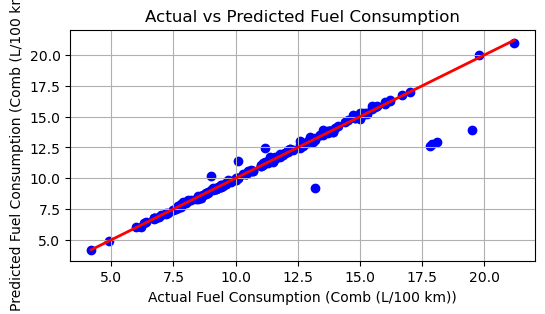

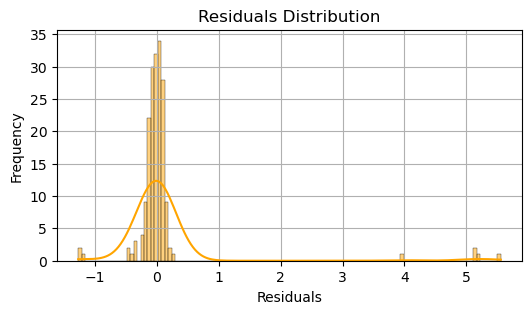

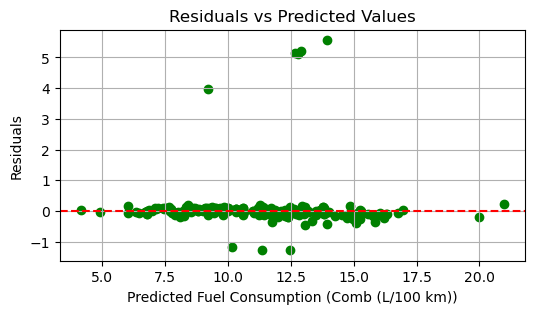

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the values with the trained model
y_pred = linear_model.predict(X_test)

# Step 1: Plot Actual vs Predicted values
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Identity line
plt.xlabel('Actual Fuel Consumption (Comb (L/100 km))')
plt.ylabel('Predicted Fuel Consumption (Comb (L/100 km))')
plt.title('Actual vs Predicted Fuel Consumption')
plt.grid(True)
plt.show()

# Step 2: Plot Residuals (Actual - Predicted)
residuals = y_test - y_pred
plt.figure(figsize=(6, 3))
sns.histplot(residuals, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution')
plt.grid(True)
plt.show()

# Step 3: Plot residuals vs predicted values to check for patterns
plt.figure(figsize=(6, 3))
plt.scatter(y_pred, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fuel Consumption (Comb (L/100 km))')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()


In [199]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2038681096645187
R² Score: 0.9786138506741854


In [205]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

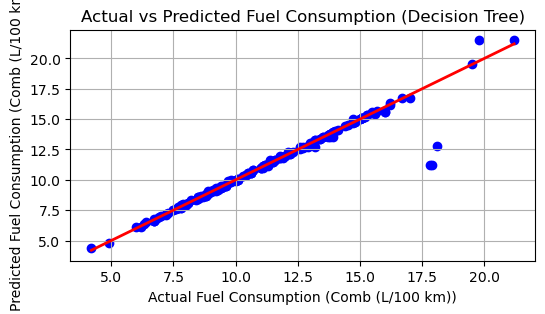

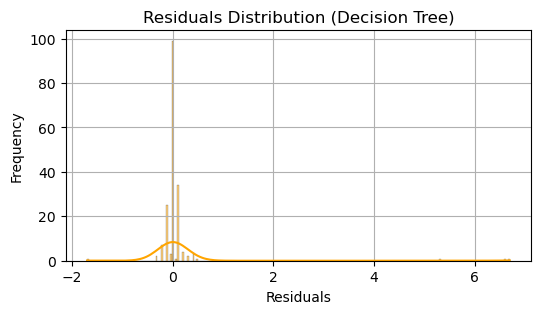

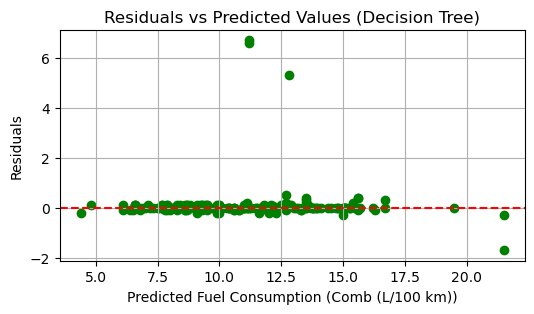

In [229]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predicting the values with the trained Decision Tree model
y_pred_dt = dt_regressor.predict(X_test)

# Step 1: Plot Actual vs Predicted values for Decision Tree
plt.figure(figsize=(6, 3))
plt.scatter(y_test, y_pred_dt, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Identity line
plt.xlabel('Actual Fuel Consumption (Comb (L/100 km))')
plt.ylabel('Predicted Fuel Consumption (Comb (L/100 km))')
plt.title('Actual vs Predicted Fuel Consumption (Decision Tree)')
plt.grid(True)
plt.show()

# Step 2: Plot Residuals (Actual - Predicted) for Decision Tree
residuals_dt = y_test - y_pred_dt
plt.figure(figsize=(6, 3))
sns.histplot(residuals_dt, kde=True, color='orange')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Decision Tree)')
plt.grid(True)
plt.show()

# Step 3: Plot Residuals vs Predicted values for Decision Tree
plt.figure(figsize=(6, 3))
plt.scatter(y_pred_dt, residuals_dt, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Fuel Consumption (Comb (L/100 km))')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values (Decision Tree)')
plt.grid(True)
plt.show()


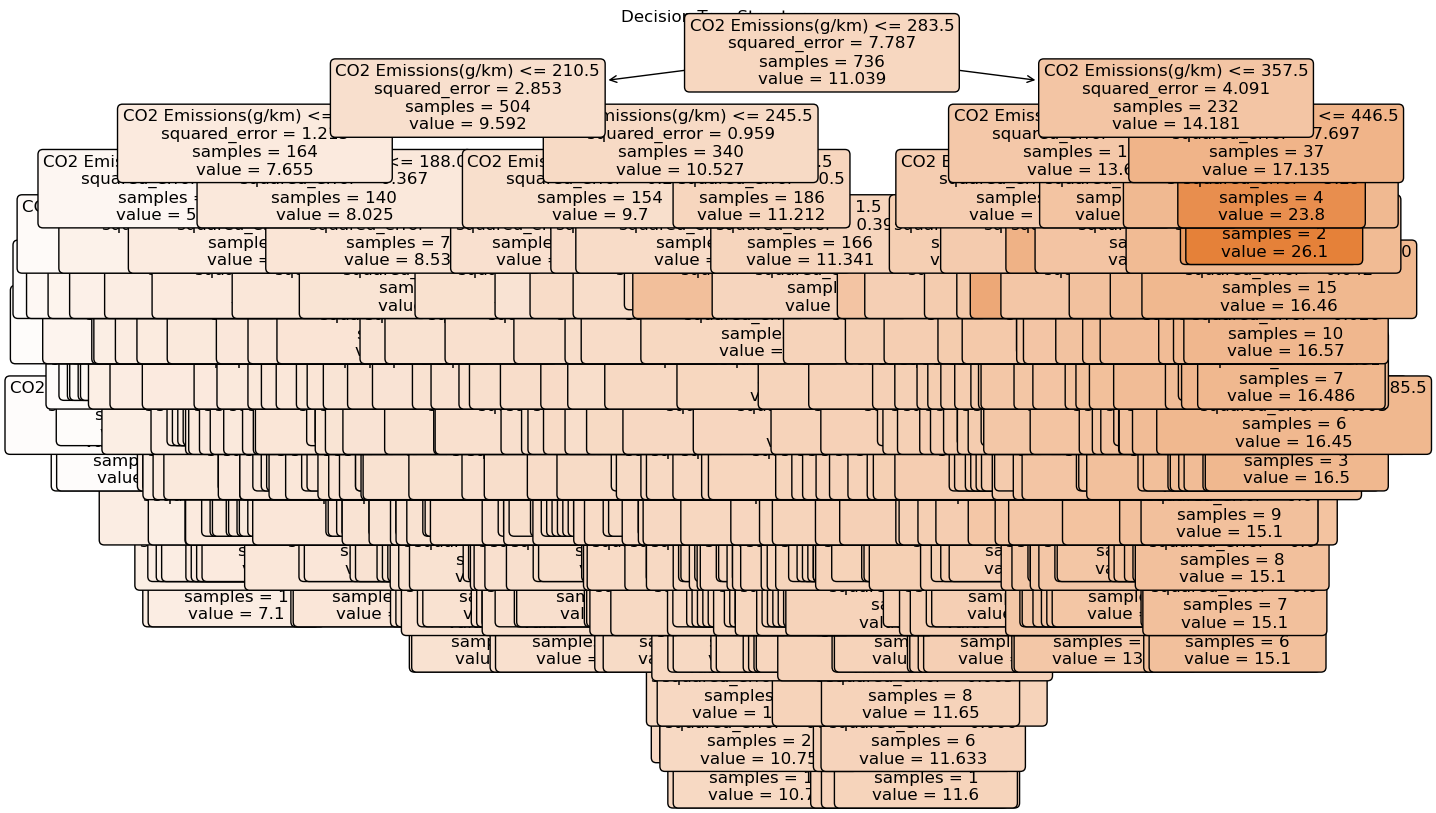

In [235]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plotting the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(dt_regressor, filled=True, feature_names=feature_names, class_names=['Low', 'Medium', 'High'], rounded=True, fontsize=12)
plt.title('Decision Tree Structure')
plt.show()


In [207]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.6570762162162164
R² Score: 0.9310714652646482


In [209]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 6: Predict and evaluate the model
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

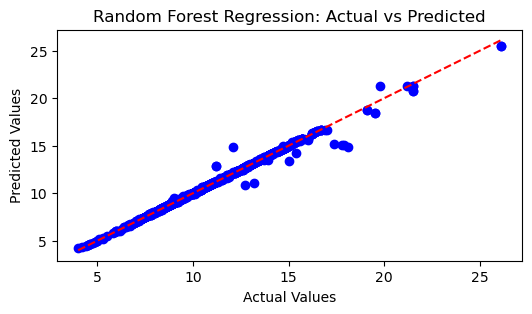

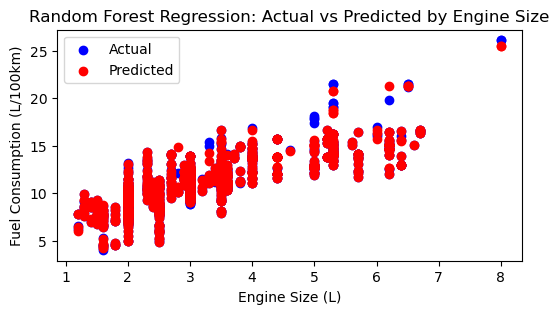

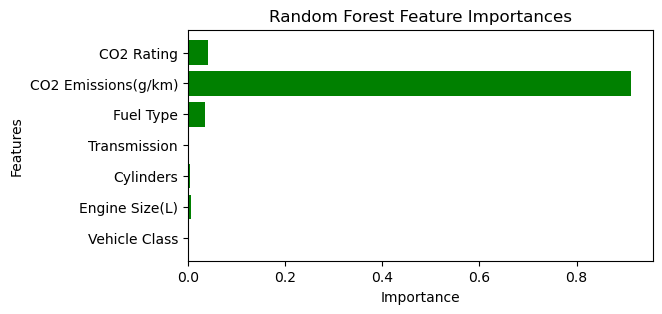

In [245]:
import matplotlib.pyplot as plt

# Make predictions with the Random Forest model
y_pred_rf = rf_regressor.predict(X)

# Plot actual vs predicted values
plt.figure(figsize=(6, 3))
plt.scatter(y, y_pred_rf, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')  # Line y = x
plt.title('Random Forest Regression: Actual vs Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

plt.figure(figsize=(6, 3))
plt.scatter(X['Engine Size(L)'], y, color='blue', label='Actual')
plt.scatter(X['Engine Size(L)'], y_pred_rf, color='red', label='Predicted')
plt.title('Random Forest Regression: Actual vs Predicted by Engine Size')
plt.xlabel('Engine Size (L)')
plt.ylabel('Fuel Consumption (L/100km)')
plt.legend()
plt.show()

import numpy as np

# Get feature importances
feature_importances = rf_regressor.feature_importances_

# Plot feature importances
plt.figure(figsize=(6, 3))
plt.barh(X.columns, feature_importances, color='green')
plt.title('Random Forest Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()


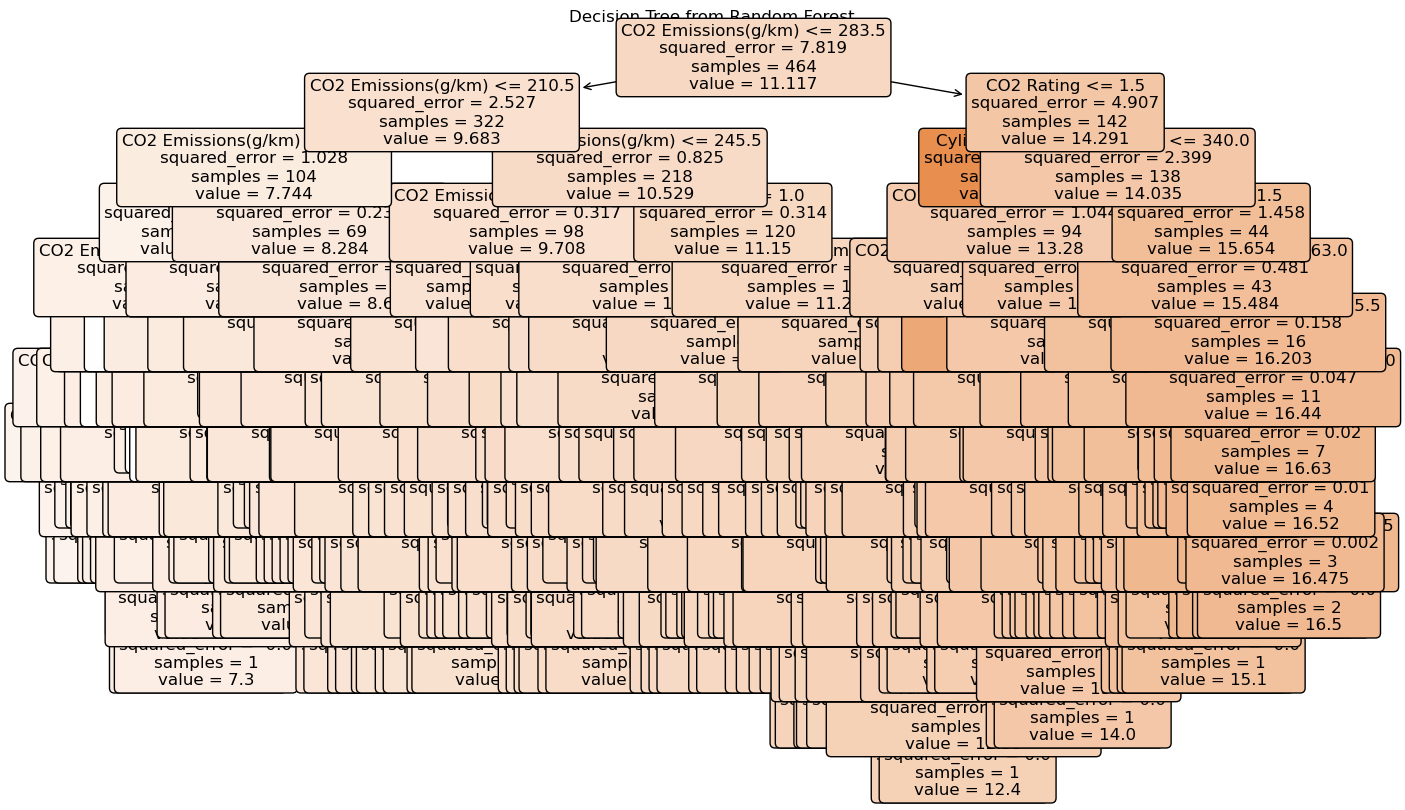

In [237]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Extract one tree from the Random Forest
tree_in_forest = rf_regressor.estimators_[0]  # Change the index to visualize different trees

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plotting one tree from the Random Forest
plt.figure(figsize=(15, 10))
plot_tree(tree_in_forest, filled=True, feature_names=feature_names, class_names=['Low', 'Medium', 'High'], rounded=True, fontsize=12)
plt.title('Decision Tree from Random Forest')
plt.show()


In [211]:
# Print the results
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.2038681096645187
R² Score: 0.9786138506741854


In [249]:
import joblib

# Save the trained Random Forest model to a file
joblib.dump(rf_regressor, 'random_forest_model.pkl')


['random_forest_model.pkl']

In [251]:
df.head()

,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption,CO2 Rating
0,Compact,2.4,4,AM,Z,8.6,6.0
1,SUV: Small,3.5,6,AS,Z,11.2,4.0
2,SUV: Small,2.0,4,AS,Z,9.9,5.0
3,SUV: Small,2.0,4,AS,Z,10.3,5.0
4,Compact,2.0,4,AS,Z,9.8,5.0
